<a href="https://colab.research.google.com/github/mihneaciorica/ecgtemplatematching/blob/main/opencv_template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

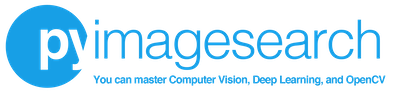

# OpenCV Template Matching ( cv2.matchTemplate ) 


### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [OpenCV Template Matching ( cv2.matchTemplate )](https://www.pyimagesearch.com/2021/03/22/opencv-template-matching-cv2-matchtemplate/) blog post published on 03-22-21.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible joining PyImageSearch Plus at [http://pyimg.co/plus/](http://pyimg.co/plus) today.*

### Download the git hub repository


In [8]:
from google.colab import drive
drive.mount(‘/content/gdrive’)

SyntaxError: ignored

In [30]:

!git pull

remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.
From https://github.com/mihneaciorica/ecgtemplatematching
   cedf5ea..df1cbd0  main       -> origin/main
Updating cedf5ea..df1cbd0
Fast-forward
 .../opencv-template-matching/images/coke_logo.png       | Bin 20542 -> 0 bytes
 .../opencv-template-matching/ondeRrabotee.png           | Bin 0 -> 6710 bytes
 2 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 opencv-template-matching/opencv-template-matching/images/coke_logo.png
 create mode 100644 opencv-template-matching/opencv-template-matching/ondeRrabotee.png


## Blog Post Code

### Import Packages

In [5]:
# import the necessary packages
import matplotlib.pyplot as plt
import cv2 as cv2
import numpy as np

### Function to display images in Jupyter Notebooks and Google Colab

In [6]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(True)
	plt.show()

### Implementing template matching with OpenCV


In [7]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to input image where we'll apply template matching")
# ap.add_argument("-t", "--template", type=str, required=True,
# 	help="path to template image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "/root/ecgtemplatematching/opencv-template-matching/opencv-template-matching/images/BBG.png",
    "template": "/root/ecgtemplatematching/opencv-template-matching/opencv-template-matching/ondeRrabotee.png"
}

In [8]:
# load the input image and template image from disk, then display
# them to  our screen
print("[INFO] loading images...")
image = cv2.imread(args["image"])
image.shape
template = cv2.imread(args["template"],0)
plt_imshow("Image", image)
plt_imshow("Template", template)

# convert both the image and template to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
templateGray = cv2.GaussianBlur(templateGray, (324, 37), 23)
plt_imshow("ImageconvertetoGRAY",imageGray)
plt_imshow("TemplateconvertedtoGRAY",templateGray)

[INFO] loading images...


AttributeError: ignored

In [1]:
# perform template matching
print("[INFO] performing template matching...")
result = cv2.matchTemplate(imageGray, templateGray,
	cv2.TM_CCOEFF_NORMED)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)


w, h = template.shape[::-1]
#was printing the dimmmension of w of the template
#duplicate code res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.38
loc = np.where( result >= threshold)
sortedlocx=np.unique(loc[1])
sortedlocy=np.unique(loc[0])
print('number of detections',sortedlocx.shape)
print(sortedlocx)
newloc = zip(loc[1], loc[0]) 
count=0
urmatoareacoordonatape=[]
nextycoordinate=[]
finaldetectlist=[]
#print(tuple(zip(*loc[::-1])))
for pt in list(sorted(newloc)) :
  try:
      urmatoareacoordonatape.append(pt[0])
      nextycoordinate.append(pt[1])
      #print(urmatoareacoordonatape)
      #print(nextycoordinate)
      currentxindex=urmatoareacoordonatape.index(pt[0])
      currentyindex=nextycoordinate.index(pt[1])
      if len(urmatoareacoordonatape) > 1 and len(nextycoordinate) > 1:
          while pt[1]-nextycoordinate[currentyindex-1] < 50 and pt[0]-urmatoareacoordonatape[currentxindex-1] < 20 :
             print('matches are too close')
          else:   
             cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
             print(pt[0],pt[1])
             finaldetectlist.append((pt[0],pt[1]))
          
          
          #nextycoordinate.remove(pt[1])
          #urmatoareacoordonatape.remove(pt[0])  
          print('detected very close') 
                 
              
      else:
         print(pt[0],pt[1])   
         count+=1 
  except:
      pass   
print(urmatoareacoordonatape)
print(nextycoordinate) 
print(finaldetectlist)    
print(len(finaldetectlist))          
print(count)
#cv2.imwrite('res.png',image)

[INFO] performing template matching...


NameError: ignored

In [173]:
# determine the starting and ending (x, y)-coordinates of the
# bounding box
(startX, startY) = maxLoc
endX = startX + template.shape[1]
endY = startY + template.shape[0]
print(endX)

808


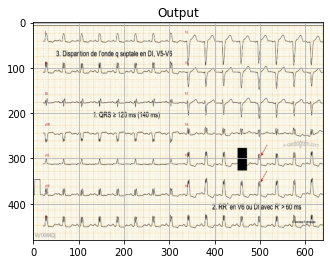

(3, 1195, 656)

In [14]:
# draw the bounding box on the image
#cv2.rectangle(image, (startX, startY), (endX, endY), (15, 0, 0), 3)

# show the output image
finalimage=cv2.resize(image,(640,480))
plt_imshow("Output", finalimage)

image.shape[::-1]


For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*OpenCV Template Matching ( cv2.matchTemplate )*](https://www.pyimagesearch.com/2021/03/22/opencv-template-matching-cv2-matchtemplate/) published on 03-22-21.

---



# Code License Agreement
```
Copyright (c) 2021 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```